In [6]:
from rl.environments.grid_world import GridWorld
from rl.environments.monty_hall_lvl1 import MontyHallLvl1

from rl.algorithms.temporal_difference.q_learning import QLearning
from rl.algorithms.temporal_difference.sarsa import SARSA
from rl.algorithms.planning.dyna_q import DynaQ

from rl.utils.visualization import plot_learning_curve


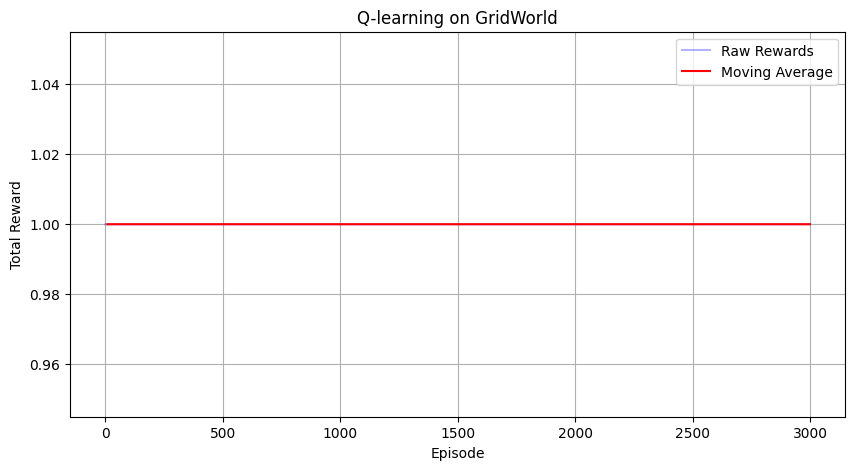

In [7]:
env = GridWorld()
agent = QLearning(env)

rewards_q = []

for _ in range(3000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_q.append(total)

plot_learning_curve(rewards_q, title="Q-learning on GridWorld")


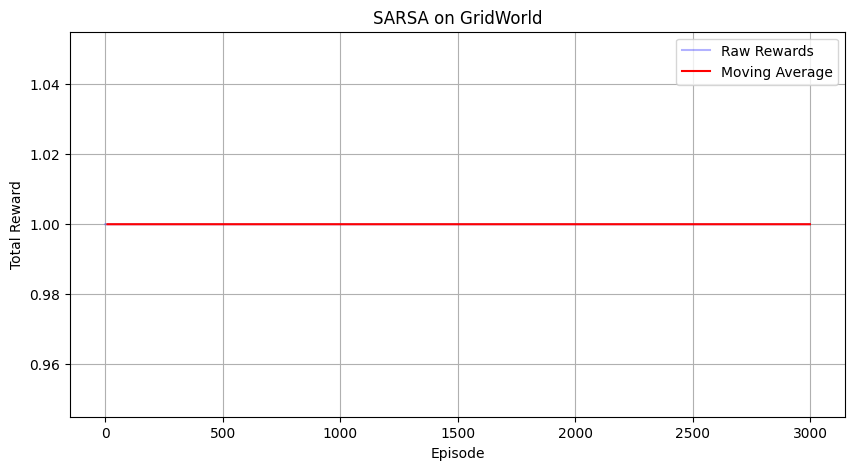

In [8]:
env = GridWorld()
agent = SARSA(env)

rewards_s = []

for _ in range(3000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_s.append(total)

plot_learning_curve(rewards_s, title="SARSA on GridWorld")


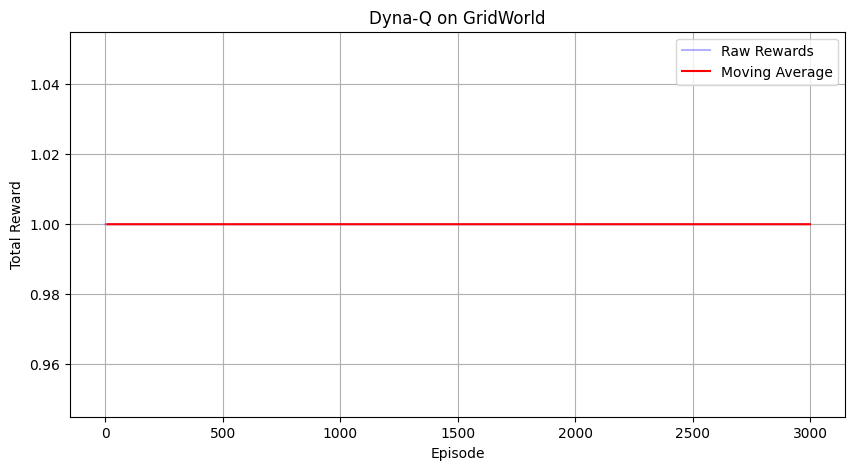

In [9]:
env = GridWorld()
agent = DynaQ(env)

rewards_d = []

for _ in range(3000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_d.append(total)

plot_learning_curve(rewards_d, title="Dyna-Q on GridWorld")


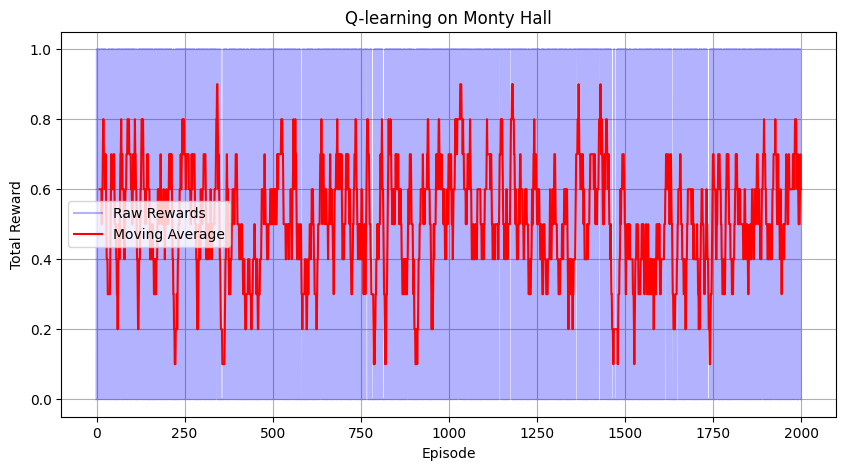

In [10]:
env = MontyHallLvl1()
agent = QLearning(env)

rewards_m = []

for _ in range(2000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_m.append(total)

plot_learning_curve(rewards_m, title="Q-learning on Monty Hall")


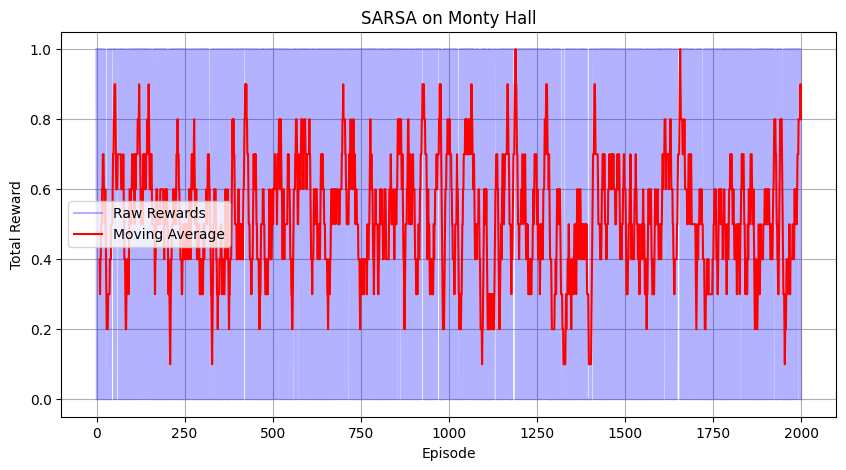

In [11]:
env = MontyHallLvl1()
agent = SARSA(env)

rewards_s = []
for _ in range(2000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_s.append(total)

plot_learning_curve(rewards_s, title="SARSA on Monty Hall")


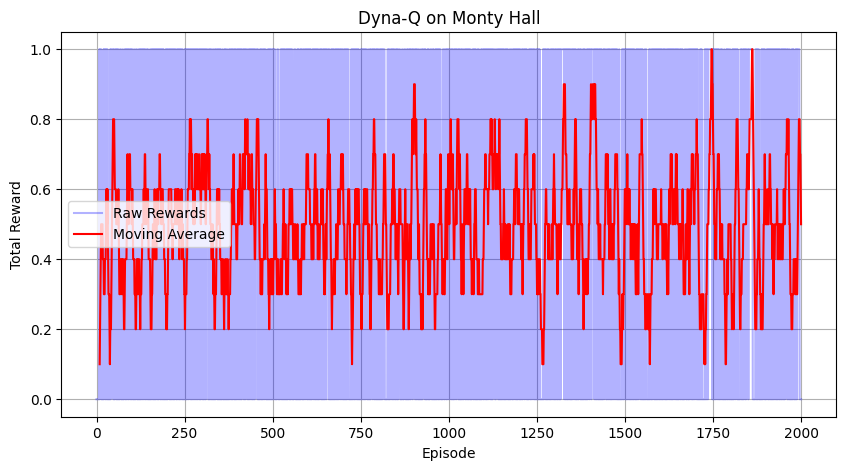

In [12]:
env = MontyHallLvl1()
agent = DynaQ(env)

rewards_d = []
for _ in range(2000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_d.append(total)

plot_learning_curve(rewards_d, title="Dyna-Q on Monty Hall")


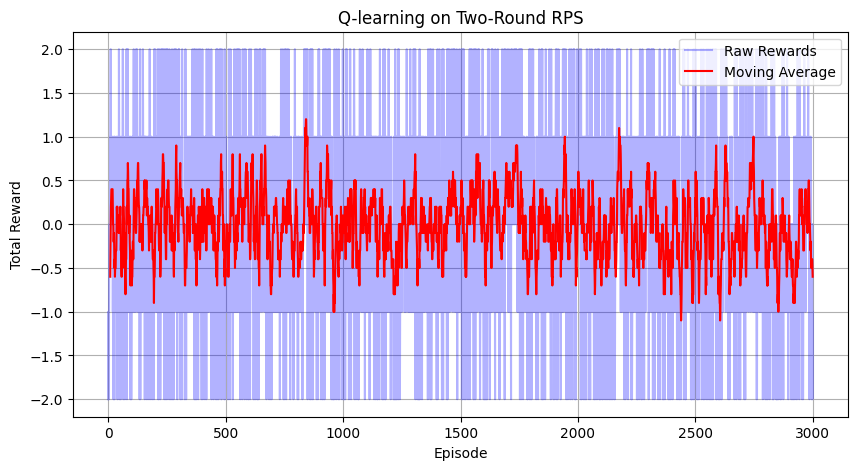

In [14]:
from rl.environments.rock_paper_scissors import RockPaperScissors

env = RockPaperScissors()
agent = QLearning(env)

rewards_rps_q = []
for _ in range(3000):
    s = env.reset()
    done = False
    total = 0
    while not done:
        a = agent.act(s)
        s, r, done, _ = env.step(a)
        total += r
    rewards_rps_q.append(total)

plot_learning_curve(rewards_rps_q, title="Q-learning on Two-Round RPS")


In [16]:
from rl.utils.serialization import load_object
from rl.environments.grid_world import GridWorld

data = load_object(r"D:\M1_IA_BD\Deep reinforcement learning\rl_projet\rl-project\saved_models\q_values\qlearning_gridworld.pkl")
policy = data["policy"]

env = GridWorld()
s = env.reset()
done = False

while not done:
    a = policy[s]
    s, r, done, _ = env.step(a)
    env.render()



| . | A | . | . | . |
| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (0, 1) | Done: False


| . | . | . | . | . |
| . | A | . | . | . |
| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (1, 1) | Done: False


| . | . | . | . | . |
| . | . | A | . | . |
| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (1, 2) | Done: False


| . | . | . | . | . |
| . | . | . | . | . |
| . | . | A | . | . |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (2, 2) | Done: False


| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | A | . |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (2, 3) | Done: False


| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | A |
| . | . | . | . | . |
| . | . | . | . | G |
Position: (2, 4) | Done: False


| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | . |
| . | . | . | . | A |
| . | . | . | . | G |
Position: (3, 4) | Done: False


In [17]:
rewards = []
for _ in range(100):
    s = env.reset()
    done = False
    total = 0
    while not done:
        s, r, done, _ = env.step(policy[s])
        total += r
    rewards.append(total)


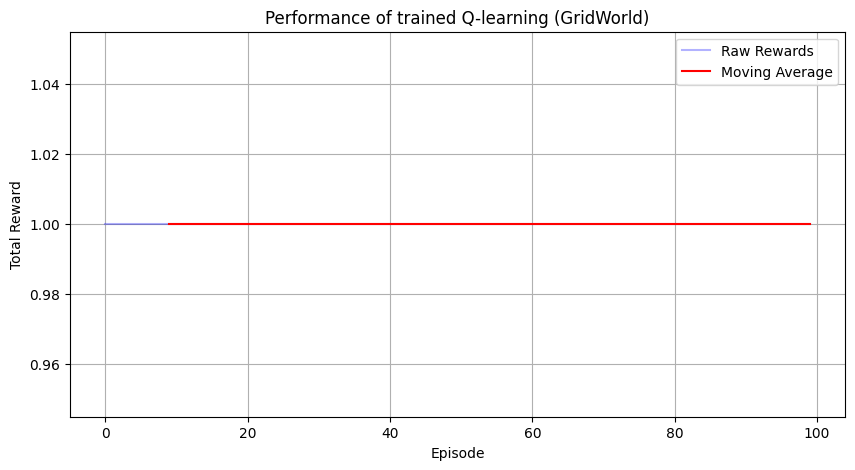

In [18]:
plot_learning_curve(rewards, title="Performance of trained Q-learning (GridWorld)")


In [19]:
def evaluate_policy(env, policy, episodes=100):
    rewards = []
    successes = 0
    
    for _ in range(episodes):
        s = env.reset()
        done = False
        total = 0
        
        while not done:
            a = policy[s]
            s, r, done, _ = env.step(a)
            total += r
        
        rewards.append(total)
        if total > 0:
            successes += 1
    
    return np.mean(rewards), successes / episodes, np.var(rewards)
